<a href="https://colab.research.google.com/github/ShreySharma15/Iris_Flower_Classification/blob/main/iris_flower_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Steps**

 0. Preprocessing + EDA + Feature Selection
 1. Extract input and output cols
 2. Scale the values
 3. Train test split
 4. Train the model
 5. Evaluate the model/model selection
 6. Deploy the model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/IRIS.csv", names=['Sepal Length', 'Sepal Width','Petal Length','Petal Width','Species'])

In [ ]:
df.shape

(150, 5)

In [ ]:
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


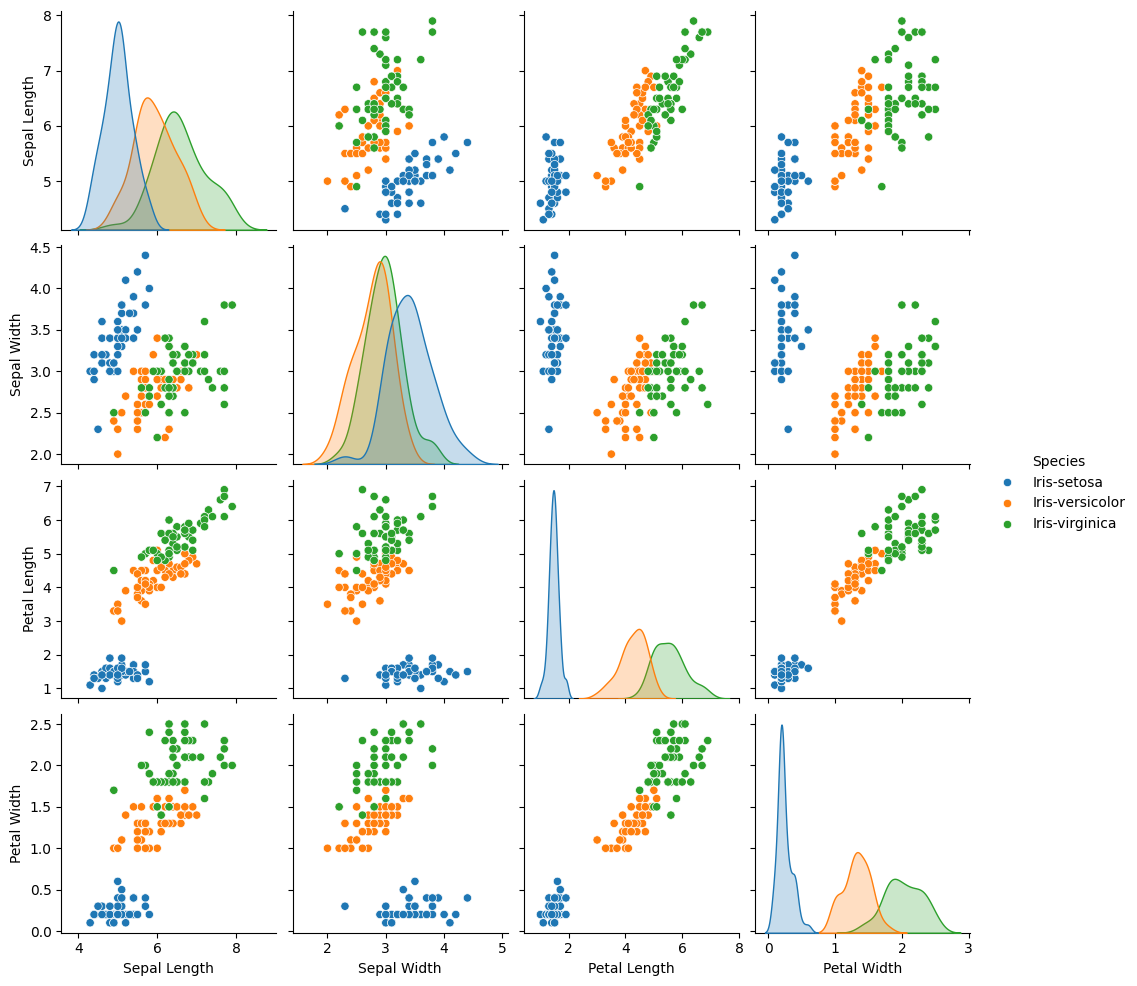

In [ ]:
#looking for pattern in data
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df,hue='Species')

<Axes: xlabel='Species', ylabel='Petal Length'>

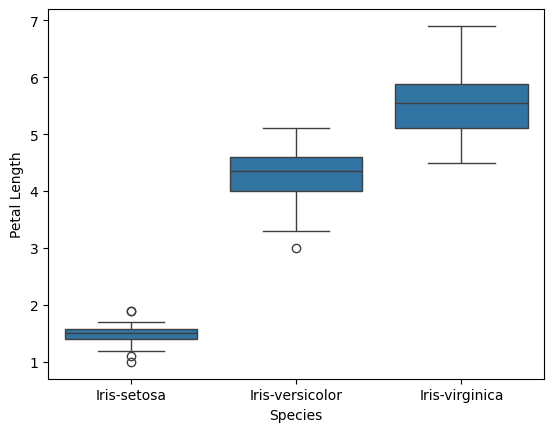

In [ ]:
sns.boxplot(x="Species", y="Petal Length", data=df)

<Axes: xlabel='Species', ylabel='Petal Width'>

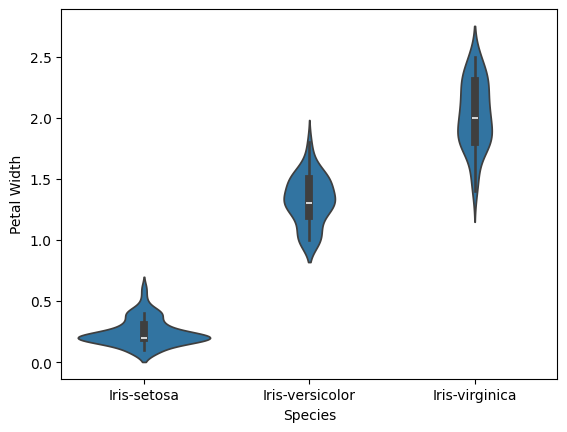

In [ ]:
sns.violinplot(x="Species", y="Petal Width", data=df)

In [ ]:
#Differentiating input and output columns
#hum dekh paa rhe hai ki sepal width ko hata sakte because sab overlap kar rahe
X = df.iloc[:,[0, 2, 3]]
Y = df.iloc[:,-1]

In [ ]:
X

,Sepal Length,Petal Length,Petal Width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [ ]:
Y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
#Differentiating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
x_train

,Sepal Length,Petal Length,Petal Width
74,6.4,4.3,1.3
8,4.4,1.4,0.2
34,4.9,1.5,0.1
92,5.8,4.0,1.2
104,6.5,5.8,2.2
...,...,...,...
61,5.9,4.2,1.5
1,4.9,1.4,0.2
144,6.7,5.7,2.5
14,5.8,1.2,0.2


In [ ]:
#scaling values for better results
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
x_train = stds.fit_transform(x_train)
x_test = stds.transform(x_test)

In [ ]:
x_test

array([[ 1.0870981 ,  1.1828713 ,  0.79770083],
       [ 1.33047827,  0.78254419,  1.45244843],
       [ 0.47864767,  0.61097543,  0.79770083],
       [ 0.35695759,  0.55378584,  0.27390275],
       [-0.85994327, -1.27628096, -1.2974915 ],
       [-0.85994327, -1.27628096, -1.16654198],
       [-0.85994327, -1.04752261, -1.03559246],
       [ 0.35695759,  1.06849213,  0.27390275],
       [ 1.45216836,  0.55378584,  0.27390275],
       [-1.22501353, -1.33347055, -1.16654198],
       [-0.37318293, -1.33347055, -1.2974915 ],
       [-0.37318293,  0.15345873,  0.14295323],
       [ 1.81723862,  1.46881924,  0.79770083],
       [ 1.0870981 ,  0.55378584,  0.40485227],
       [ 1.9389287 ,  1.35444007,  0.92865035],
       [ 0.72202784,  0.89692336,  1.45244843],
       [ 1.33047827,  1.12568171,  1.45244843],
       [ 1.69554853,  1.1828713 ,  0.53580179],
       [-0.49487302, -1.39066014, -1.03559246],
       [ 0.72202784,  0.43940666,  0.40485227],
       [ 0.84371793,  0.78254419,  1.059

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
#to check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9333333333333333

In [ ]:
lr.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)

Text(50.72222222222221, 0.5, 'Actual Values')

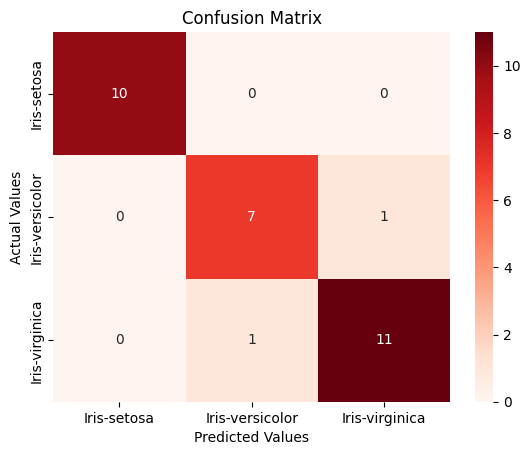

In [ ]:
#plotting the confusion matrix
sns.heatmap(cm,annot=True,cmap='Reds',xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
